In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("/content/heart_disease.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


In [ ]:
df.info() # 908 rows x 13col

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
cols_to_encode = df.select_dtypes(include=['object'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [ ]:
df

In [ ]:
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12]]
y= df.iloc[:,11]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

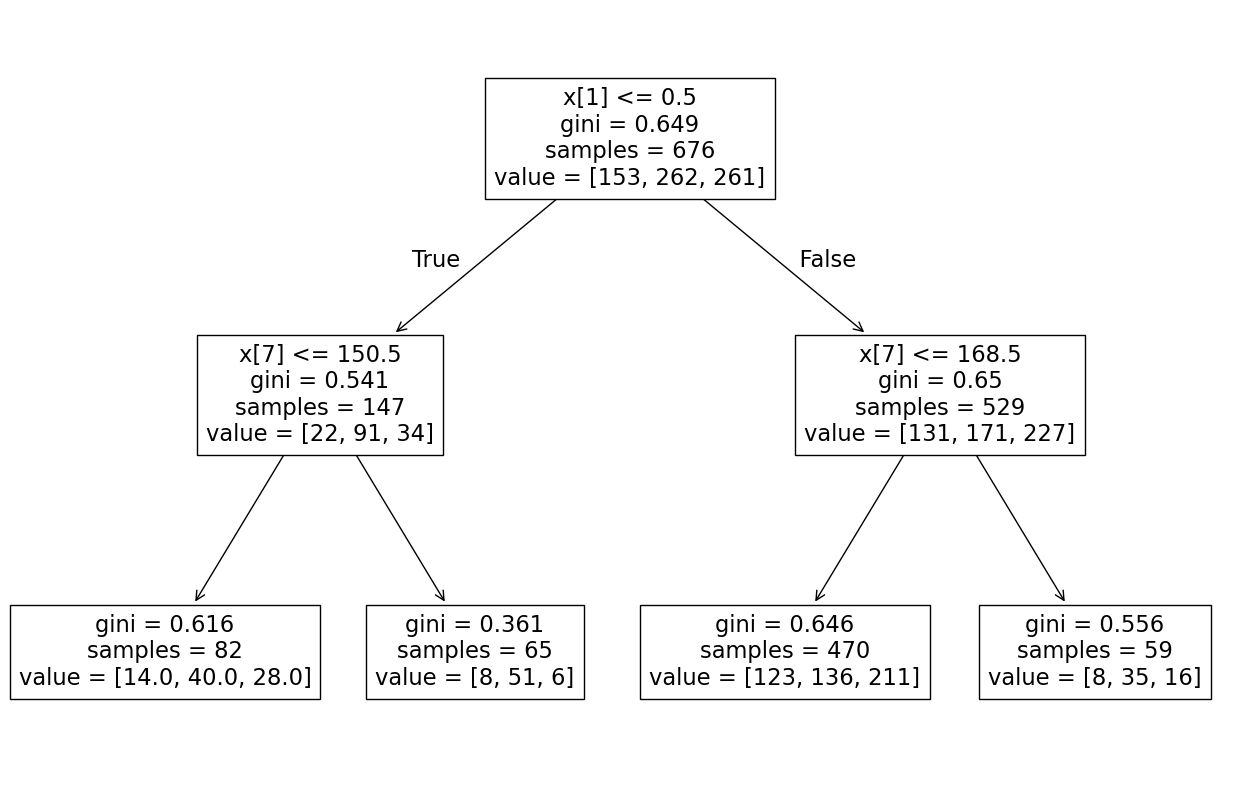

In [ ]:
plt.figure(figsize=(16,10))
tree.plot_tree(model)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.4588235294117647

In [ ]:
model.feature_importances_

array([0.      , 0.549312, 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.450688, 0.      , 0.      , 0.      , 0.      ])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3,4,5,6,7,8],'criterion':['gini','entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
grid_search.fit(x_train,y_train)

best_model = grid_search.best_estimator_

In [ ]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

<Axes: ylabel='None'>

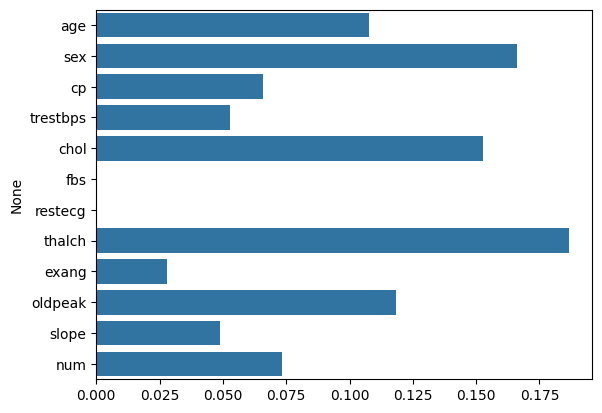

In [ ]:
feature_importance = model.feature_importances_
sns.barplot(x=feature_importance,y=x.columns)

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
**Common Hyperparameters of Decision Tree Models & Their Effects:**

- **Max Depth:** Limits the depth of the tree to prevent overfitting. A shallow tree may underfit, while a deep tree may overfit.

- **Min Samples Split:** Defines the minimum number of samples required to split a node. A higher value reduces overfitting but may underfit.

- **Min Samples Leaf:** Specifies the minimum number of samples required in a leaf node. Larger values make the model more general but less sensitive to small patterns.

- **Max Features:** Limits the number of features considered for a split, helping control model complexity and improve generalization.

- **Criterion (Gini/Entropy):** Determines how the tree selects splits. Gini is computationally faster, while entropy is more information-theoretic.

- **Pruning (Post/Pre-Pruning):** Prevents overfitting by removing unnecessary branches or stopping early.

# 2. What is the difference between the Label encoding and One-hot encoding?
- **Label Encoding:** Converts categorical values into numerical labels (e.g., "Red" → 0, "Blue" → 1). It is useful for ordinal data but may introduce unintended relationships for non-ordinal categories.

- **One-Hot Encoding:** Creates binary columns for each category (e.g., "Red" → [1,0,0], "Blue" → [0,1,0]). It prevents misinterpretation but increases dimensionality, which can be problematic for high-cardinality features.